# MTH9879 Homework 7

Assigned: March 14, 2024.
Due: March 28, 2024 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually. To receive full credit, you must upload a completed copy of this Jupyter notebook to this [Dropbox File Request link](https://www.dropbox.com/request/omNtMfpe4NQKnrU9iOPI) by the due date and time.  All python code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color=blue>Please name your submission as <b>9879HW07_Lastname_Firstname.ipynb</b> (noticing the underscores) <br>
e.g., for John Smith, the filename should read 9879HW07_Smith_John. <br> </font>
<font color=red><i>Violation of the naming rule will incur a 20% penalty to the score. </i></font>

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TAs: Robert Wei (robert.wei.p72@gmail.com) and Adam Wen (wen.adam@hotmail.com).</font>

### 0. (0 points) 
Read Chapters 10, 13 and 14 of Trades, Quotes and Prices

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}, \tfrac12<\alpha <1$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2 H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

#### <font color=blue> Solution 1. </font>

The variance of the difference is
$$\begin{align}\Var[X_{t+\tau}-X_t]&=\Var[\sum_{i=t+1}^{t+\tau}\epsilon_i]\\&=\sum_{i,j=t+1}^{t+\tau} \E[\epsilon_i\epsilon_j]\\&= \tau+2(\tau-1)\gamma(1)+2(\tau-2)\gamma(2)+\cdots+2\gamma(\tau-1) \\&\sim \tau+2(\tau-1)1^{-\alpha}+2(\tau-2)2^{-\alpha}+\cdots+2(\tau-1)^{-\alpha}\\&=\tau+2\sum_{i=1}^{\tau-1}(\tau-i)i^{-\alpha}\\
&\sim\tau+2\int_{1}^{\tau}\tau x^{-\alpha} -x^{1-\alpha} dx\\
&= \tau + 2(\frac{1}{1-\alpha}(\tau^{2-\alpha}-\tau)-\frac{1}{2-\alpha}(\tau^{2-\alpha}-1))\\&\sim \tau^{2-\alpha}=\tau^{2H}
\end{align}$$
When $\alpha\in(\frac{1}{2},1)$ and $\tau\to\infty$

## BAC data from 19-Sep-2017 again

#### Set up `Python` environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import acf

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
tqdata = pd.read_csv('tqDataBAC1_20170919.csv')
tqdata['TIME'] = pd.to_datetime(tqdata['TIME'])
tqdata = tqdata.set_index('TIME')

trade_signs = tqdata['SIGN']

### 2. (12 points)

(a) Fit an AR(1) model to `trade_signs` to give the forecast:
<p>
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$

(b) How does $\phi_1$ relate to the autocorrelation coefficients of `trade_signs`?  
    
(c)    What is the mean-squared error of this AR(1) forecast?

(d) Fit an $AR(p)$ model to `trade_signs`, allowing `Python` to find the best value of $p$ using the Bayes Information Criterion (BIC).  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$
What value of $p$ is selected by `Python`? 
    
(e)    What is the mean-squared error of this AR(p) forecast?


#### <font color=blue> Solution 2(a). </font>

In [8]:
# Fit an AR(1) model to the trade_signs series
model = AutoReg(trade_signs, lags=1)
model_fitted = model.fit()

# Display the coefficients
print("Coefficients:")
print(model_fitted.params)


Coefficients:
const     -0.059194
SIGN.L1    0.475231
dtype: float64


#### <font color=blue> Solution 2(b). </font>

In [10]:
# Calculate the autocorrelation coefficients
autocorr_coeffs = acf(trade_signs, fft=True)

# Print the autocorrelation coefficients
for lag, value in enumerate(autocorr_coeffs):
    print(f"Lag {lag:2}: {value:.3f}")


Lag  0: 1.000
Lag  1: 0.475
Lag  2: 0.379
Lag  3: 0.350
Lag  4: 0.324
Lag  5: 0.305
Lag  6: 0.284
Lag  7: 0.267
Lag  8: 0.250
Lag  9: 0.240
Lag 10: 0.232
Lag 11: 0.227
Lag 12: 0.214
Lag 13: 0.201
Lag 14: 0.200
Lag 15: 0.199
Lag 16: 0.188
Lag 17: 0.181
Lag 18: 0.172
Lag 19: 0.169
Lag 20: 0.169
Lag 21: 0.164
Lag 22: 0.160
Lag 23: 0.158
Lag 24: 0.159
Lag 25: 0.156
Lag 26: 0.150
Lag 27: 0.148
Lag 28: 0.142
Lag 29: 0.134
Lag 30: 0.138
Lag 31: 0.139
Lag 32: 0.122
Lag 33: 0.119
Lag 34: 0.121
Lag 35: 0.111
Lag 36: 0.112
Lag 37: 0.114
Lag 38: 0.105
Lag 39: 0.107
Lag 40: 0.108
Lag 41: 0.104
Lag 42: 0.104
Lag 43: 0.104


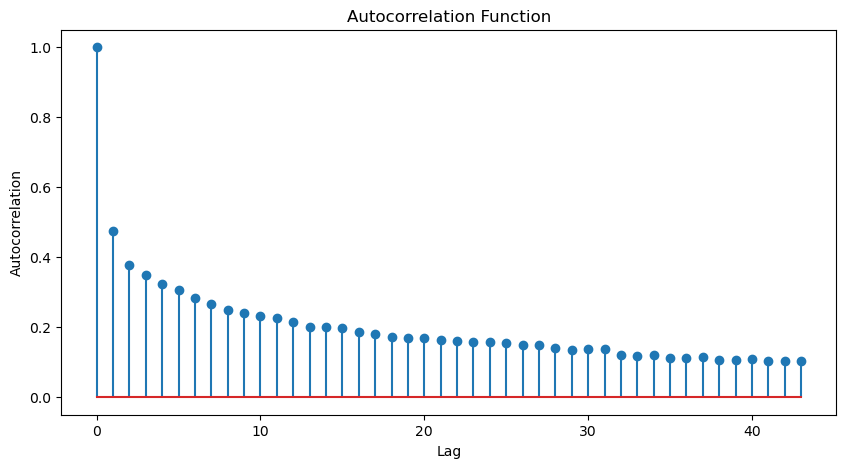

In [11]:
# plot the autocorrelation function
plt.figure(figsize=(10, 5))
plt.stem(range(len(autocorr_coeffs)), autocorr_coeffs, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

The plot shows that there is long memory in the trade signs. If the memory is short, the autocorrelation coefficients with lag $p$ should simply be $\phi_1^p$ or close to it, since only the model with lag 1 has effect.

#### <font color=blue> Solution 2(c). </font>

In [12]:
print("MSE of AR(1) model: ", model_fitted.resid.pow(2).mean())

MSE of AR(1) model:  0.7643048007879093


#### <font color=blue> Solution 2(d). </font>

In [14]:
# Use ar_select_order to select the optimal lag length p using BIC
selected_order = ar_select_order(trade_signs, maxlag=50, ic='bic', trend='c')

# Display the selected value of p
print("Optimal lag length (p):", selected_order.ar_lags)

Optimal lag length (p): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


So the optimal value $p$ for $AR(p)$ model is 15.

#### <font color=blue> Solution 2(e). </font>

In [17]:
# Fit an AR(1) model to the trade_signs series
model_opt = AutoReg(trade_signs, lags=15)
model_opt_fitted = model.fit()

# Display the coefficients
print("Coefficients:")
print(model_opt_fitted.params)


Coefficients:
const      -0.023749
SIGN.L1     0.312437
SIGN.L2     0.102778
SIGN.L3     0.087182
SIGN.L4     0.057863
SIGN.L5     0.048406
SIGN.L6     0.031864
SIGN.L7     0.024443
SIGN.L8     0.013953
SIGN.L9     0.015908
SIGN.L10    0.015452
SIGN.L11    0.022938
SIGN.L12    0.011159
SIGN.L13    0.002622
SIGN.L14    0.016027
SIGN.L15    0.026044
dtype: float64


In [18]:
print("MSE of AR(15) model: ", model_opt_fitted.resid.pow(2).mean())

MSE of AR(15) model:  0.696460725929187
